In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data =  pd.read_csv("../data/PJME_hourly.csv")

In [23]:
df = data.copy()

In [24]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [26]:
df.shape

(145366, 2)

In [27]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [28]:

print("Start date:", df['Datetime'].min())
print("End date:", df['Datetime'].max())

Start date: 2002-01-01 01:00:00
End date: 2018-08-03 00:00:00


In [29]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

In [30]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [31]:
# check if data is hourly
df.index.inferred_freq


In [32]:
df.isna().sum()


PJME_MW    0
dtype: int64

In [33]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


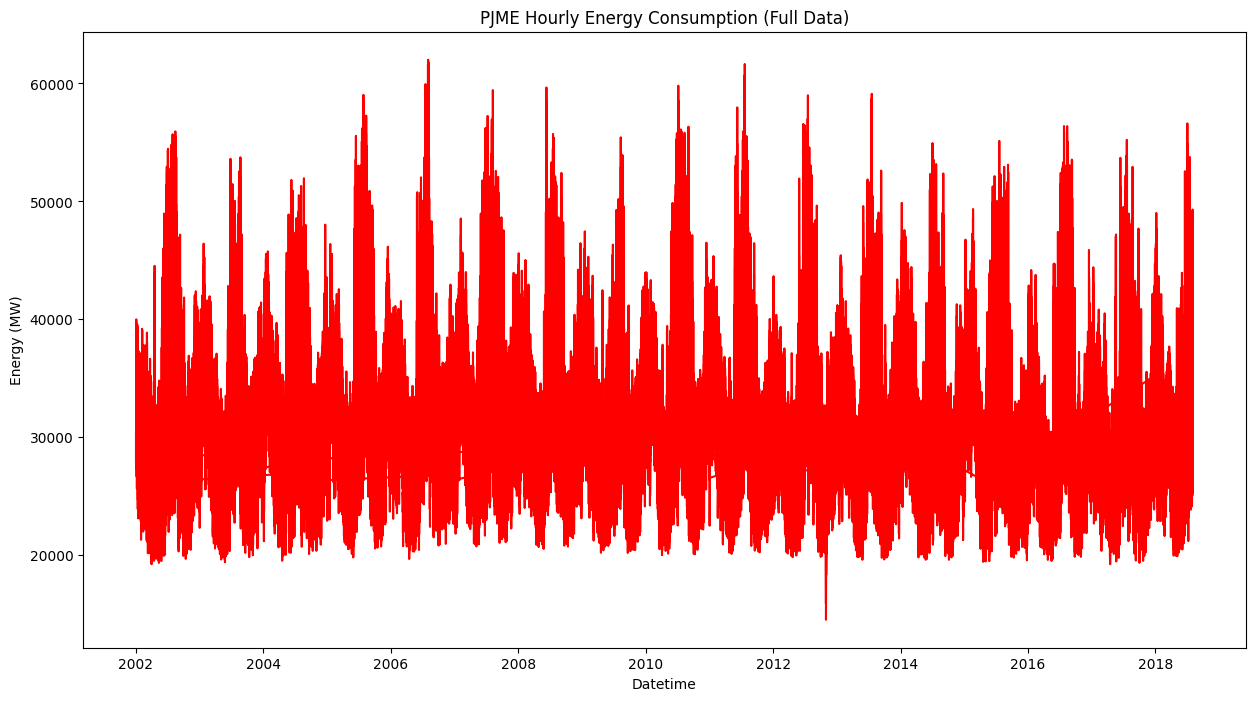

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(df['PJME_MW'], color='red')
plt.title('PJME Hourly Energy Consumption (Full Data)')
plt.xlabel('Datetime')
plt.ylabel('Energy (MW)')
plt.show()


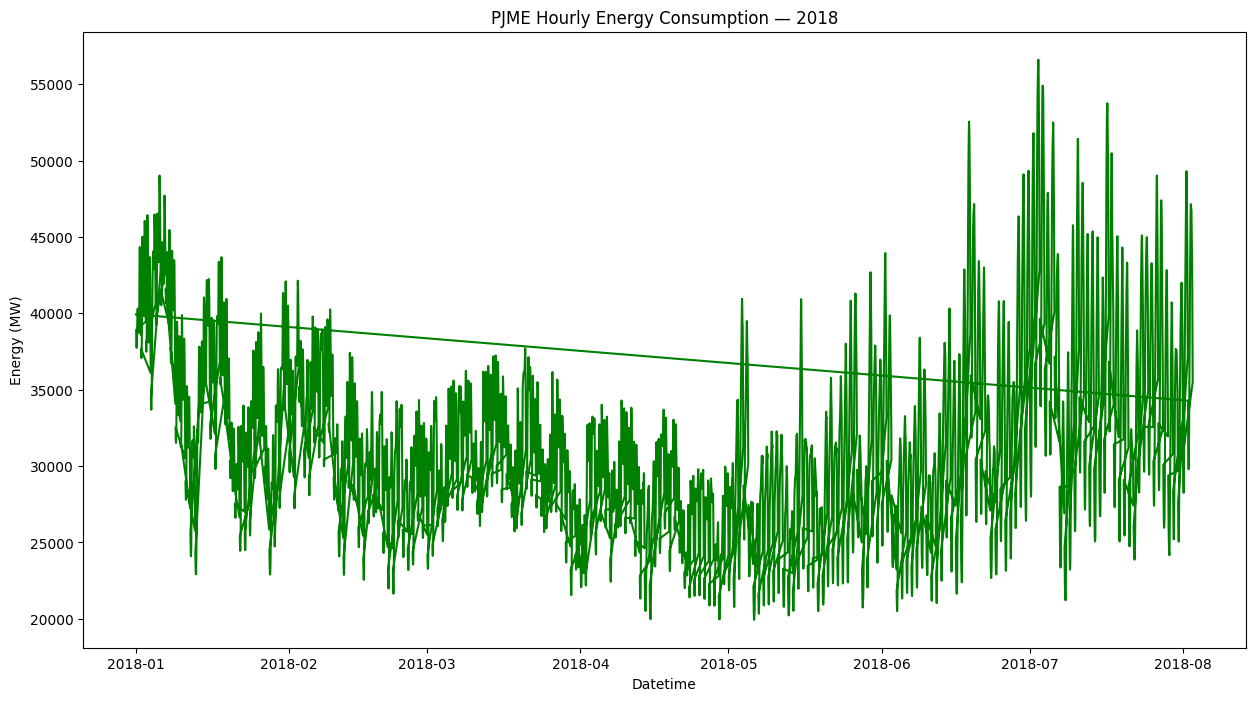

In [35]:
df_2018 = df.loc['2018']
plt.figure(figsize=(15,8))
plt.plot(df_2018['PJME_MW'], color='green')
plt.title('PJME Hourly Energy Consumption — 2018')
plt.xlabel('Datetime')
plt.ylabel('Energy (MW)')
plt.show()


Year 2018 (Overall View)

    Energy consumption is high at the beginning of the year (~45,000 MW in January).

    Demand declines steadily and reaches a local minimum around May.

    From June onward, consumption shows a strong upward trend.

    July is the peak month, with values reaching ~55,000 MW, the highest in 2018.

    August shows a slight decline compared to July.

Key insight:

    High demand in winter (Jan) → heating

    Lower demand in spring (Apr–May) → mild weather

    Peak in summer (Jul) → air conditioning

    Slight drop after peak summer


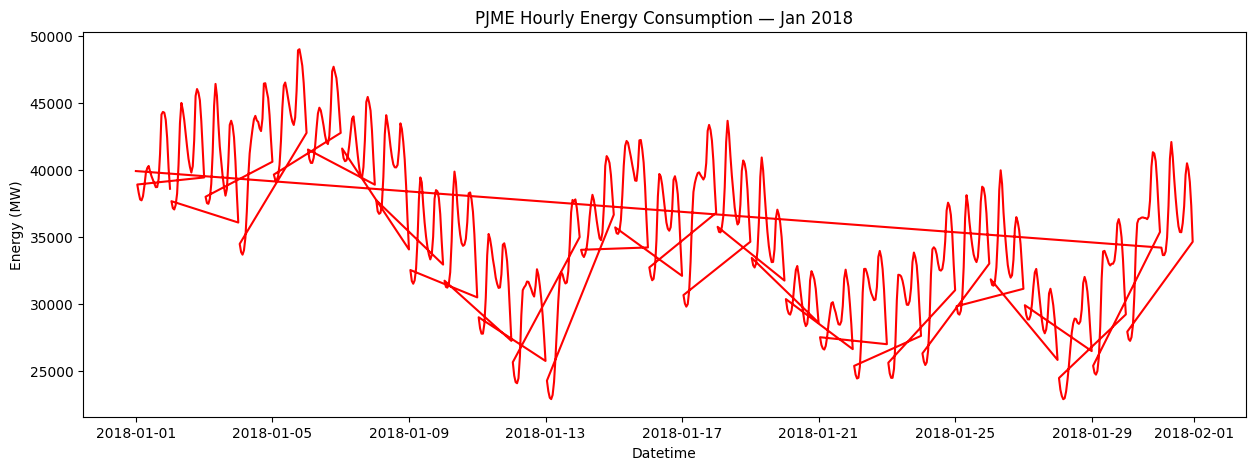

In [36]:
df_jan2018 = df.loc['2018-01']
plt.figure(figsize=(15,5))
plt.plot(df_jan2018['PJME_MW'], color='red')
plt.title('PJME Hourly Energy Consumption — Jan 2018')
plt.xlabel('Datetime')
plt.ylabel('Energy (MW)')
plt.show()


January 2018 (Monthly View)

    From Jan 1–5, there is a clear upward trend, peaking near 50,000 MW on Jan 5.

    From Jan 5–13, consumption shows a strong downward trend, reaching a low of ~25,000 MW.

    Jan 13–17 shows a recovery (upward trend).

    Jan 17–21 shows another decline, comparable to the previous dip.

    From Jan 21–25, demand rises again.

    After Jan 25, consumption declines toward month-end.

Key insight:

    The month shows repeating cycles, not a smooth trend.

    This strongly suggests weekly seasonality (weekdays vs weekends).

In [37]:
df_week = df.loc['2018-01-01':'2018-01-07']
plt.figure(figsize=(15,3))
plt.plot(df_week['PJME_MW'], color='orange')
plt.title('Jan 1-7, 2018')
plt.show()


KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

First Week of January 2018 (Weekly View)

    First 3 days show high volatility, fluctuating between 38,000–46,000 MW.

    On Jan 4, there is a sharp drop to ~34,000 MW.

    From Jan 5–7, consumption rises again with strong upward fluctuations.

    The peak occurs around Jan 7, exceeding 48,000 MW.   

Important intuition:

    Clear daily seasonality (hourly peaks & troughs)

    Possible weekday vs weekend effect

    Sudden drops may be:

        Weekends

        Holidays

        Weather events

In [38]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [39]:
time_diffs = df.index.to_series().diff().value_counts().head(10)
time_diffs


Datetime
0 days 01:00:00      139275
-2 days +01:00:00      6040
0 days 02:00:00          29
729 days 01:00:00         8
728 days 01:00:00         7
0 days 00:00:00           4
-2 days +02:00:00         1
577 days 01:00:00         1
Name: count, dtype: int64

In [40]:
df.index.duplicated().sum()


np.int64(4)

In [41]:
df = df.groupby(df.index).mean()


In [42]:
df.index.is_unique


True

In [43]:
df_hourly = df.asfreq('H')
df_hourly.index.inferred_freq



C:\Users\POWER\AppData\Local\Temp\ipykernel_17996\2292973008.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.asfreq('H')


'h'

In [44]:
df_hourly.isna().sum()


PJME_MW    30
dtype: int64

In [45]:
missing_hours = df_hourly['PJME_MW'].isna().sum()
missing_hours

np.int64(30)

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_decomp = df_hourly.dropna()


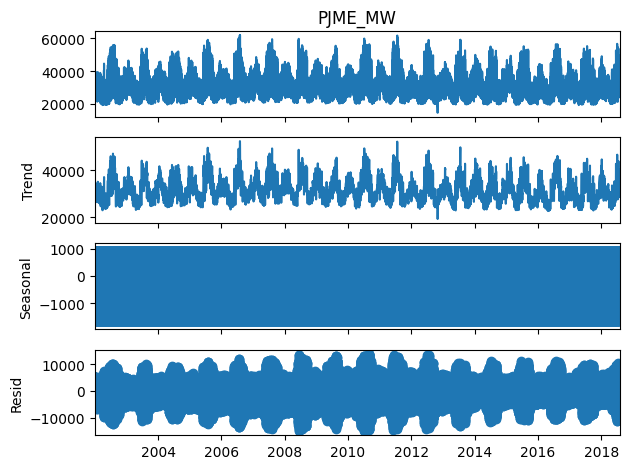

In [47]:
decomp_daily = seasonal_decompose(
    df_decomp['PJME_MW'],
    model='additive',
    period=24
)

decomp_daily.plot()
plt.show()


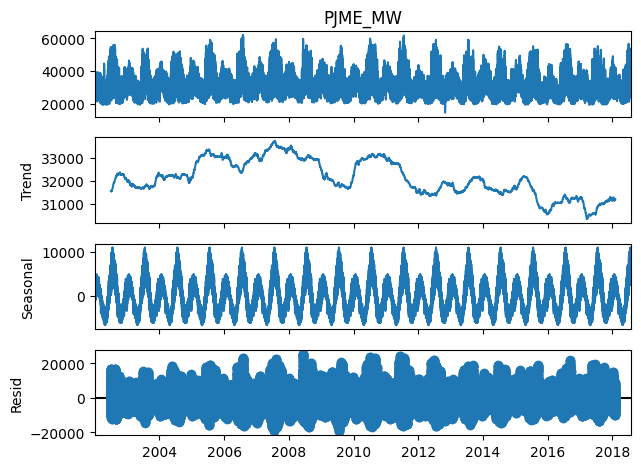

In [48]:
decomp_yearly = seasonal_decompose(
    df_decomp['PJME_MW'],
    model='additive',
    period=24*365
)

decomp_yearly.plot()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_hourly['PJME_MW'].dropna())

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -19.88501894835223
p-value: 0.0


In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(df_hourly['PJME_MW'].dropna(), regression='c')

print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])


KPSS Statistic: 1.30553447925908
p-value: 0.01


C:\Users\POWER\AppData\Local\Temp\ipykernel_14992\1270487851.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df_hourly['PJME_MW'].dropna(), regression='c')


In [49]:
df_diff1 = df_hourly['PJME_MW'].diff()


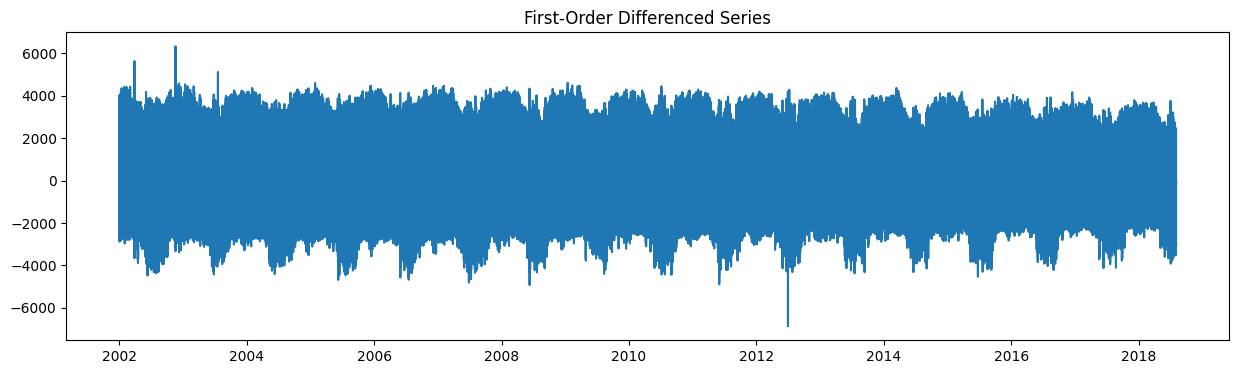

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.plot(df_diff1)
plt.title("First-Order Differenced Series")
plt.show()


In [51]:
df_diff_seasonal = df_hourly['PJME_MW'].diff(24)


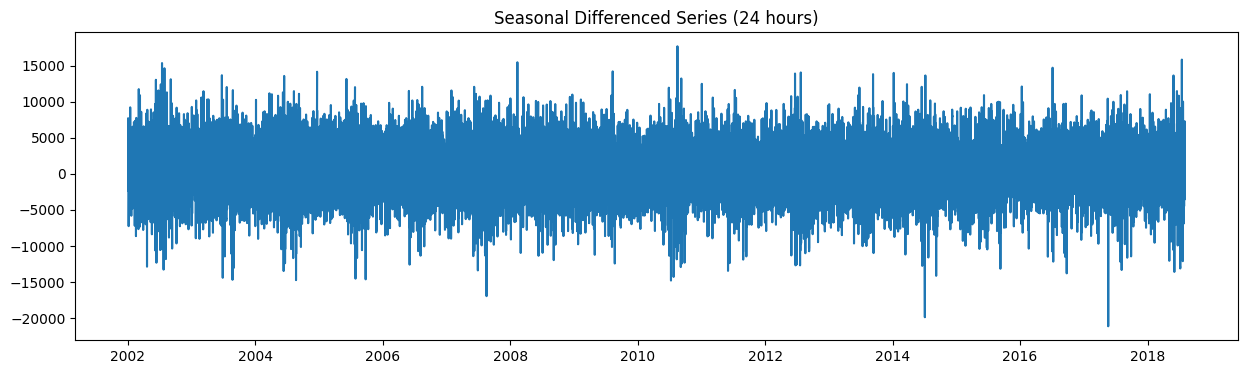

In [52]:
plt.figure(figsize=(15,4))
plt.plot(df_diff_seasonal)
plt.title("Seasonal Differenced Series (24 hours)")
plt.show()


In [53]:
df_diff_final = df_hourly['PJME_MW'].diff().diff(24)


In [54]:
df_diff_final = df_diff_final.dropna()


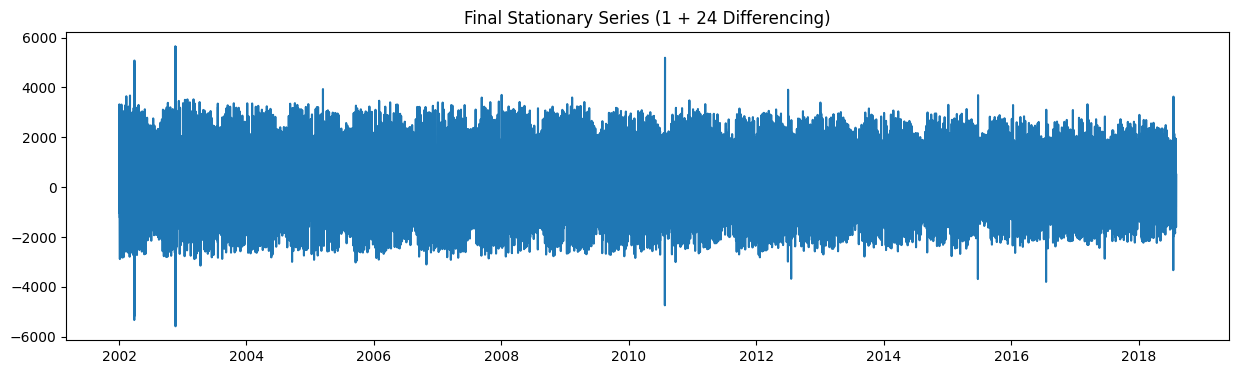

In [55]:
plt.figure(figsize=(15,4))
plt.plot(df_diff_final)
plt.title("Final Stationary Series (1 + 24 Differencing)")
plt.show()


In [56]:
from statsmodels.tsa.stattools import adfuller

adf_final = adfuller(df_diff_final)
print("ADF p-value:", adf_final[1])


KeyboardInterrupt: 

In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_final = kpss(df_diff_final, regression='c')
print("KPSS p-value:", kpss_final[1])


KPSS p-value: 0.1


C:\Users\POWER\AppData\Local\Temp\ipykernel_14992\2755270506.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_final = kpss(df_diff_final, regression='c')


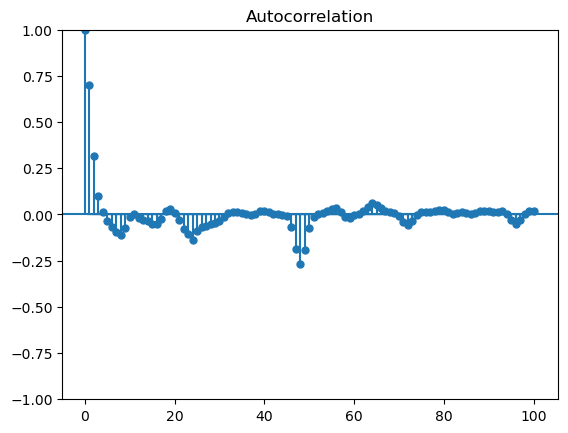

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df_diff_final, lags=100)
plt.show()


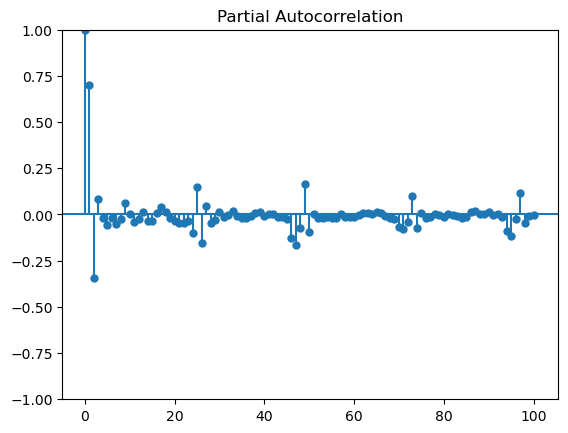

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_diff_final, lags=100, method='ywm')
plt.show()


In [60]:
df_daily = df_diff_final.resample('D').mean()



In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    df_daily,
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                           PJME_MW   No. Observations:                 6058
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -37300.129
Date:                           Sun, 11 Jan 2026   AIC                          74610.258
Time:                                   18:09:25   BIC                          74643.790
Sample:                               01-02-2002   HQIC                         74621.899
                                    - 08-03-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3397      0.010    -32.676      0.000      -0.360      -0.319
ma.L1         -1.0000      1.297     -0.771

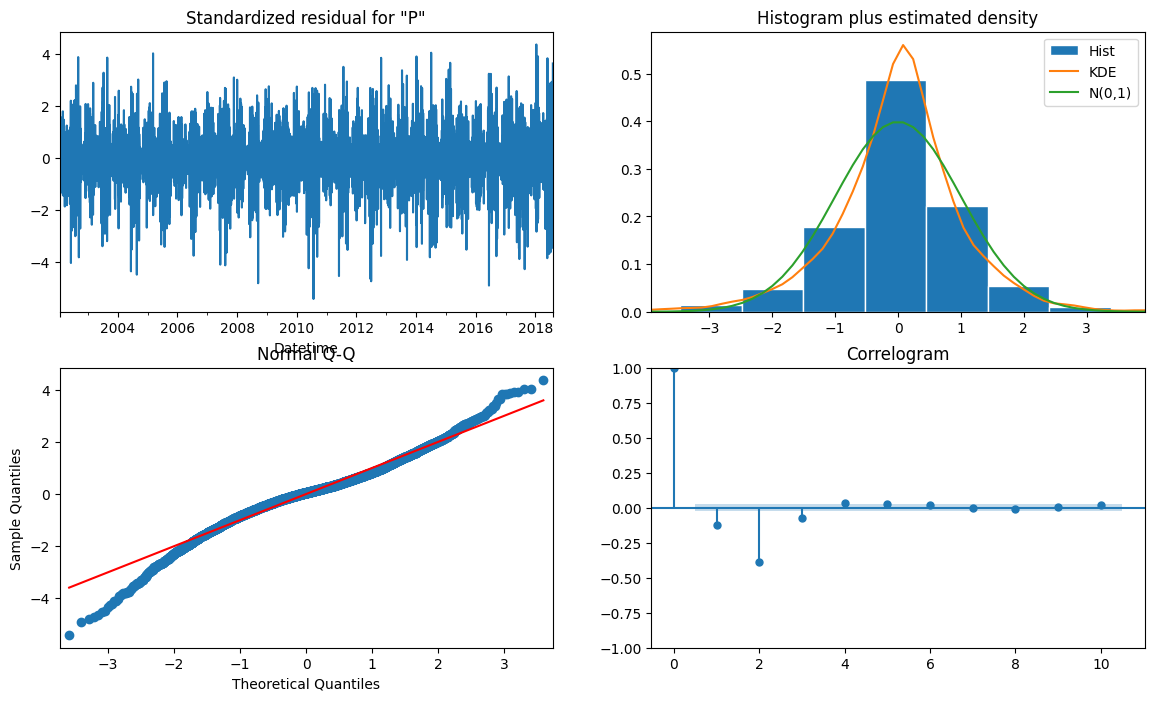

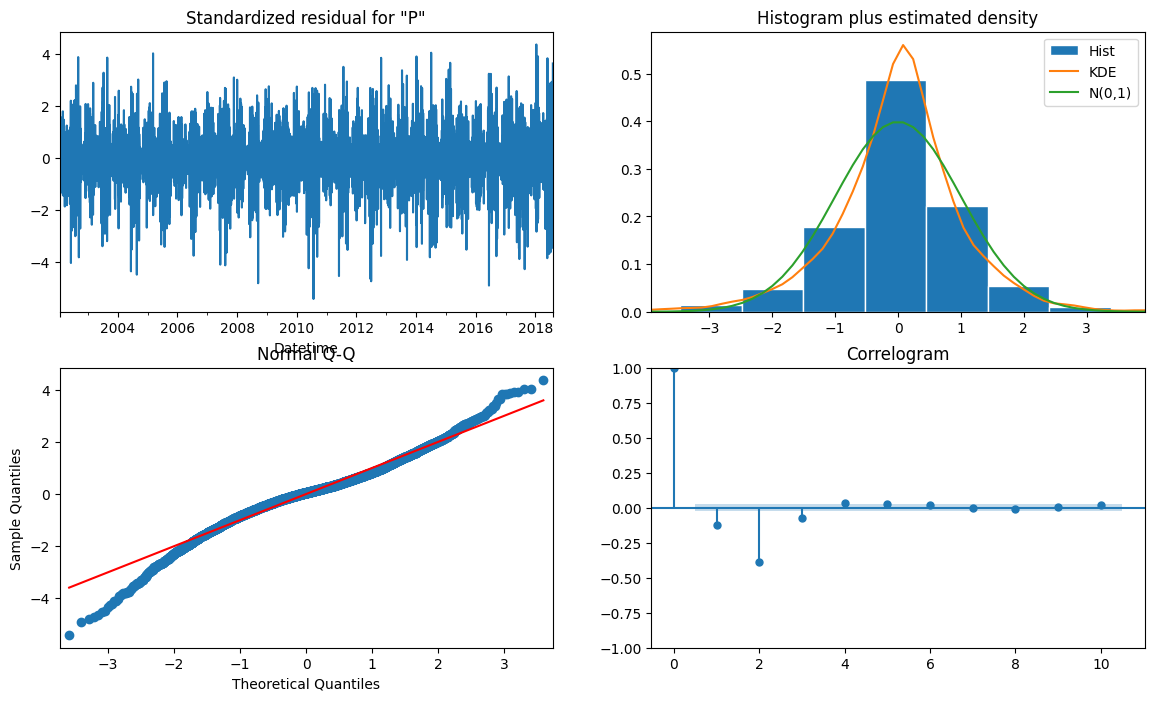

In [65]:
results.plot_diagnostics(figsize=(14,8))


In [67]:
forecast = results.get_forecast(steps=30)
forecast_df = forecast.summary_frame()
forecast_df


PJME_MW,mean,mean_se,mean_ci_lower,mean_ci_upper
2018-08-04,-212.216453,115.635395,-438.857663,14.424757
2018-08-05,122.313739,122.115577,-117.028395,361.655873
2018-08-06,39.284549,122.844569,-201.486382,280.055479
2018-08-07,-45.273747,122.927320,-286.206867,195.659374
2018-08-08,-17.644784,122.937237,-258.597340,223.307772
2018-08-09,6.867400,122.938256,-234.087154,247.821953
2018-08-10,-18.335599,122.938416,-259.290466,222.619268
2018-08-11,-38.801555,122.947271,-279.773779,202.170669
2018-08-12,63.541619,122.948173,-177.432372,304.515609
2018-08-13,60.005949,122.948318,-180.968326,300.980223


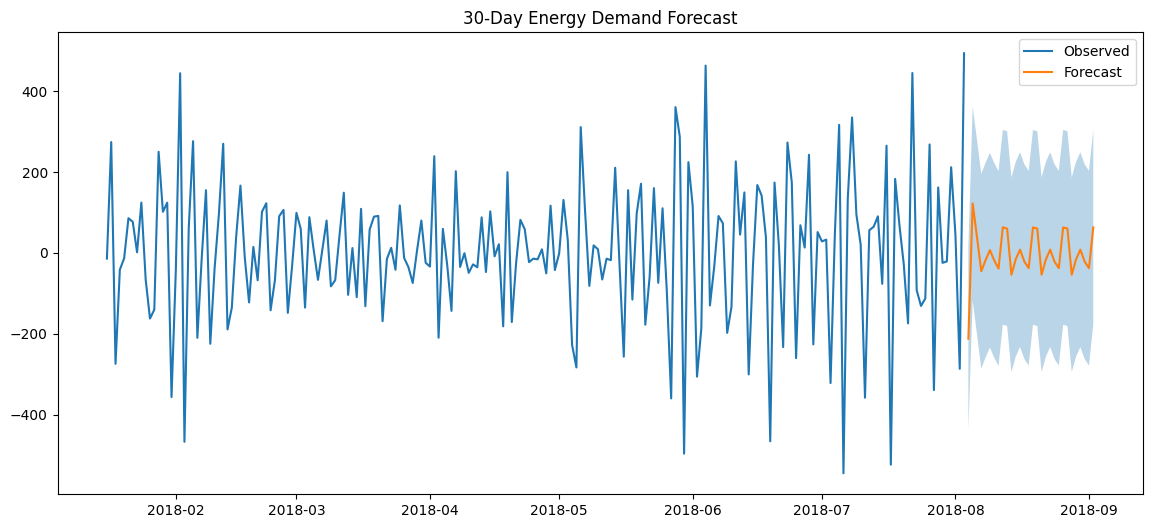

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_daily[-200:], label='Observed')
plt.plot(forecast_df['mean'], label='Forecast')
plt.fill_between(
    forecast_df.index,
    forecast_df['mean_ci_lower'],
    forecast_df['mean_ci_upper'],
    alpha=0.3
)
plt.legend()
plt.title("30-Day Energy Demand Forecast")
plt.show()


In [66]:
model2 = SARIMAX(
    df_daily,
    order=(1,1,0),
    seasonal_order=(0,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results2 = model2.fit()
print(results2.summary())


                                      SARIMAX Results                                      
Dep. Variable:                             PJME_MW   No. Observations:                 6058
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 7)   Log Likelihood              -39545.574
Date:                             Sun, 11 Jan 2026   AIC                          79097.148
Time:                                     18:14:20   BIC                          79117.267
Sample:                                 01-02-2002   HQIC                         79104.132
                                      - 08-03-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5514      0.008    -66.105      0.000      -0.568      -0.535
ma.S.L7       -1.0059      

In [71]:
df_exog2 = pd.DataFrame(index=df_daily.index)
df_exog2['month'] = df_daily.index.month



In [72]:
model_x2 = SARIMAX(
    df_daily,
    exog=df_exog2,
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_x2 = model_x2.fit()
print(results_x2.summary())


c:\Users\POWER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                           PJME_MW   No. Observations:                 6058
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -37933.972
Date:                           Sun, 11 Jan 2026   AIC                          75879.943
Time:                                   19:05:36   BIC                          75920.181
Sample:                               01-02-2002   HQIC                         75893.912
                                    - 08-03-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
month         20.0064      0.759     26.351      0.000      18.518      21.494
ar.L1         -0.3027      0.014    -21.665